## Problem 1: Gradient Descent

In this problem, we are going to solve the regression problem with batch and stochastic gradient descent methods. The objective of this problem is to compare the loss of each method. Since this problem is simple, the loss would reduce rapidly. So, "iterate no more than 100 times".

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
X = np.hstack((np.ones((100, 1)), X))

(1) Find the fitted line with the batch gradient descent method and plot the loss.

Note: the loss function for the regression problem is MSE.

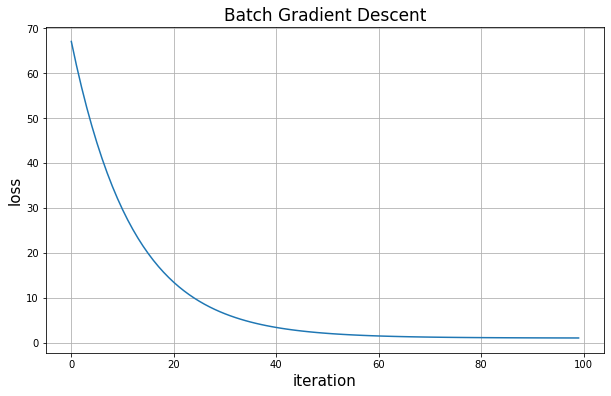

In [3]:
LR = 0.0001
n_iter = 100
m = 100

theta = np.random.randn(2, 1)
loss = []

X = np.asmatrix(X)
y = np.asmatrix(y)
theta = np.asmatrix(theta)
for i in range(n_iter):
    df = 2 * (X.T*X*theta - X.T*y)
    theta = theta - LR*df
    
    MSE = (1/m) * np.matmul((X@theta - y).T,  (X@theta - y)).item()
    loss.append(MSE)
        
plt.figure(figsize=(10, 6))
plt.plot(loss)
plt.title('Batch Gradient Descent', fontsize=17)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.grid()
plt.show()

(2) Find the fitted line with the stochastic gradient descent method and plot the loss. We use a stochastic gradient descent method to prevent the model converging to a local minimum, but the stochastic gradient descent method makes it hard to converge to a global minimum, too. To solve this problem, we are going to reduce the learning rate gradually. In other words, use a large learning rate at first and decrease it gradually.

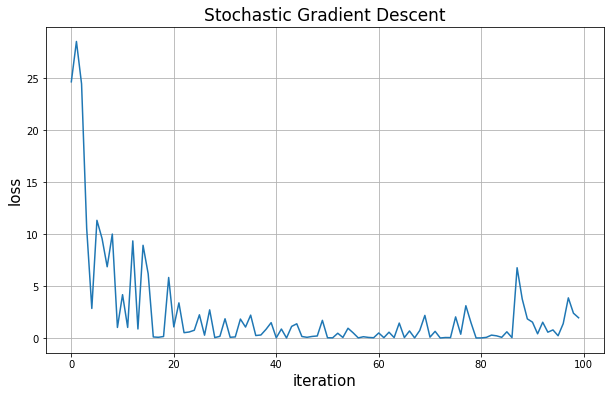

In [4]:
n_epochs = 1
t0, t1 = 5, 50

def LearningRate(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)
loss = []

for epoch in range(n_epochs):
    for i in range(m):
        randi = np.random.choice(m, 1)
        xi = X[randi, :]
        yi = y[randi, :]
        
        df = 2 * (xi.T*xi*theta - xi.T*yi)
        
        theta = theta - LearningRate(2*m + i)*df
        
        MSE = np.matmul((xi@theta - yi).T,  (xi@theta - yi)).item()
        loss.append(MSE)
        
plt.figure(figsize=(10, 6))
plt.plot(loss)
plt.title('Stochastic Gradient Descent', fontsize=17)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('loss', fontsize=15)
plt.grid()
plt.show()

## Problem 2: Regularization

Solve the below problem and type the solution using the markdown.

Do not submit another scanning file about this problem.

The regularized least-squares problem has the form
$$ \min_{θ} ||Aθ−y||^2_2+λ|θ|^2_2 $$ 

(a) Show that the solution is given by
$$ \hat{θ} =(A^TA+λI_n)^{−1}A^Ty $$
 
&nbsp;&nbsp;&nbsp;&nbsp;Do not use the method of Lagrangian multipliers

$$ L(A) = ||Aθ−y||^2_2+λ|θ|^2_2 \\ $$ 

$$
\begin{align}
& \min_{θ} L(A) = \min_{θ} ||Aθ−y||^2_2+λ|θ|^2_2 \\
\end{align}
$$

$$
\begin{align}
&= (Aθ−y)^T(Aθ−y)+λθ^Tθ \\
&= θ^TA^TAθ - θ^TA^Ty - y^TAθ + y^Ty + λθ^Tθ \\
\end{align}
$$

$$
\frac{\partial{L}}{\partial{θ}} =  A^TAθ + (A^TA)^Tθ - A^Ty - A^Ty + 2λθ  = 0
$$

$$
\begin{align}
& \rightarrow 2(A^TA)\theta - 2(A^Ty) + 2\lambda\theta = 0 \\
\end{align}
$$

$$
\begin{align}
& \rightarrow (A^TA)\theta - (A^Ty) + \lambda\theta = 0 \\
\end{align}
$$

$$
\begin{align}
& \rightarrow (A^TA + \lambda{I})\theta = A^Ty \\
& \therefore \hat{\theta} = (A^TA + \lambda{I})^{-1}A^Ty
\end{align}
$$

(b) Write down a gradient descent algorithm for the given optimization problem.

&nbsp;&nbsp;&nbsp;&nbsp;Hint: Note that
$$ ||Aθ−y||^2_2=(Aθ−y)^T(Aθ−y) $$
 

&nbsp;&nbsp;&nbsp;&nbsp;Then, you can differentiate the above equation to compute the gradient. 

&nbsp;&nbsp;&nbsp;&nbsp;Likewise, you can compute the gradient of the regularizer.

$$
\nabla_{\theta}\mathcal{E} = 2(A^TA)\theta - 2(A^Ty) + 2\lambda\theta \\
\therefore \theta\leftarrow\theta - \eta\nabla_{\theta}\mathcal{E}
$$

(c) Based on the result of (b), describe the role of regularizer term.

&nbsp;&nbsp;&nbsp;&nbsp;Hint: Gradient *g* is computed by *g* = *g*<sub>projection</sub> + *g*<sub>regularizer</sub>.

$
\begin{align}
& g_{projection} = 2(A^TA)\theta - 2(A^Ty) \\
& g_{regularizer} = 2\lambda\theta
\end{align}
$  
<br><br>
We want to balance between how well function fits data and magnitude of coefficients.
However, overfitting often happens and associates with very large estimated parameters $\theta$.
<br><br>
In the regularizer term, $\lambda$ is a tuning parameter, trades off between low loss and small values of $\theta$. In other words, $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates. And the regularizer term is small when $\theta_1$, ... , $\theta_d$ are close to zeros, and so it has the effect of shrinking the estimates of $\theta_j$ towards zero. In a nutshell, the role of regularizer term is to penalize large parameters $\theta$.

(d) Describe results of (a) and (b) have the same meaning.

(a) $ \hat{θ} =(A^TA+λI_n)^{−1}A^Ty $
<br>
(b) $ \nabla_{\theta}\mathcal{E} = 2(A^TA)\theta - 2(A^Ty) + 2\lambda\theta \\
\therefore \theta\leftarrow\theta - \eta\nabla_{\theta}\mathcal{E} $

(a) and (b) both try to find the theta that minimizes the objective function $ L(A) = ||Aθ−y||^2_2+λ|θ|^2_2 \\ $.
<br><br>
In the way of (a), we look at the derivative of the $L(A)$ to find minimum as $\hat{\theta}$. For convex problems, any location where $L'(A)$ = 0 will be a flat point in the function and this is guaranteed to be a minimum.
<br><br>
However, it is hard to calculate $A^T$ when the data is huge. To solve this problem, in the way of (b), we try to find the minimum as repeatedly taking steps by updating $\theta$ with a learning rate in the direction of the negative gradient.

## Problem 3: Handling Overfitting

You will fit some data to the polynomial functions.

In [5]:
import warnings
warnings.filterwarnings(action='ignore')

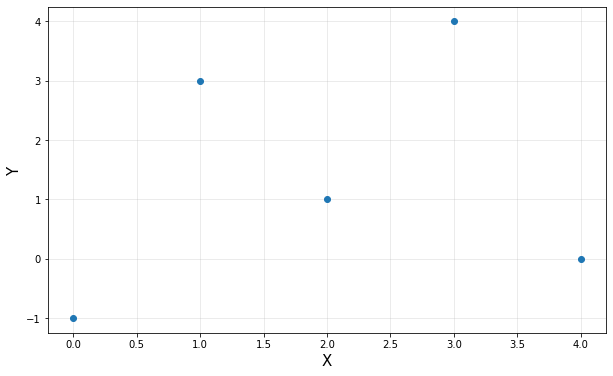

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 5
x = np.linspace(0, 4, n)
y = np.array([-1, 3, 1, 4, 0])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

(1) Fit the given data to the 3rd degree and the 5th degree polynomials and plot both results.

Use numpy.polyfit.

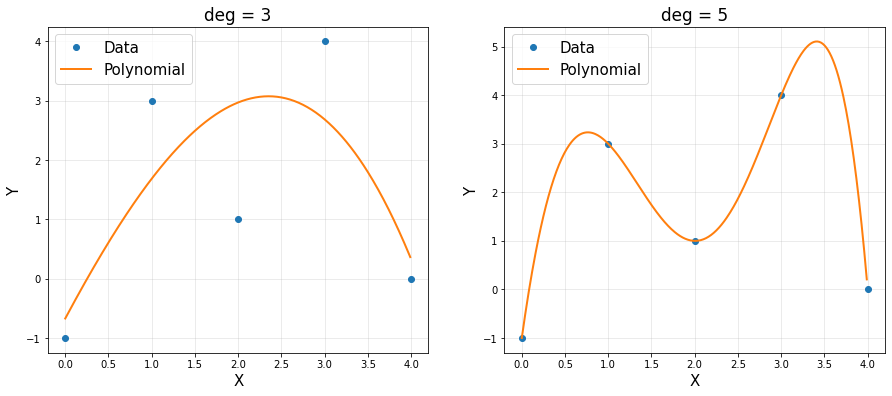

In [7]:
xp = np.arange(0, 4, 0.01)

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
poly_3 = np.polyfit(x, y, deg=3)
plt.plot(x, y, 'o', label='Data')
plt.plot(xp, np.polyval(poly_3, xp), linewidth=2, label='Polynomial')
plt.title('deg = 3', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
poly_5 = np.polyfit(x, y, deg=5)
plt.plot(x, y, 'o', label = 'Data')
plt.title('deg = 5', fontsize=17)
plt.plot(xp, np.polyval(poly_5, xp), linewidth=2, label='Polynomial')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

(2) Plot the similar figure using TensorFlow.

In [8]:
from sklearn.preprocessing import MaxAbsScaler

m = 5
LR = 0.4
train_x = x.reshape(-1, 1)
train_y = y.reshape(-1, 1)
xp = np.linspace(0, 4, 100).reshape(-1,1)
def y_poly(d, n_iter, lamb=0):                                                  
    train_X = np.hstack([train_x**(i+1) for i in range(d)])
    train_X = MaxAbsScaler().fit_transform(train_X)
    train_X = np.asmatrix(train_X)

    x = tf.placeholder(tf.float32, [m, d])
    y = tf.placeholder(tf.float32, [m, 1])

    w = tf.Variable(tf.random_normal([d, 1]))
    b = tf.Variable(tf.random_normal([1, 1]))

    y_pred = tf.add(tf.matmul(x, w), b)
    loss = tf.reduce_mean(tf.square(y_pred - y))
    reg = tf.reduce_mean(tf.square(w))
    loss = tf.reduce_mean(loss + lamb*reg)

    optm = tf.train.AdamOptimizer(LR).minimize(loss)
    init = tf.global_variables_initializer()

    loss_record = []
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_iter):                                                                         
            sess.run(optm, feed_dict={x: train_X, y: train_y})  
            loss_record.append(sess.run(loss, feed_dict={x: train_X, y: train_y}))

        w_val = sess.run(w)
        b_val = sess.run(b)

    Xp = np.hstack([xp**(i+1) for i in range(d)])
    Xp = MaxAbsScaler().fit_transform(Xp)
    Xp = np.asmatrix(Xp)
    yp = Xp*w_val + b_val

    return yp

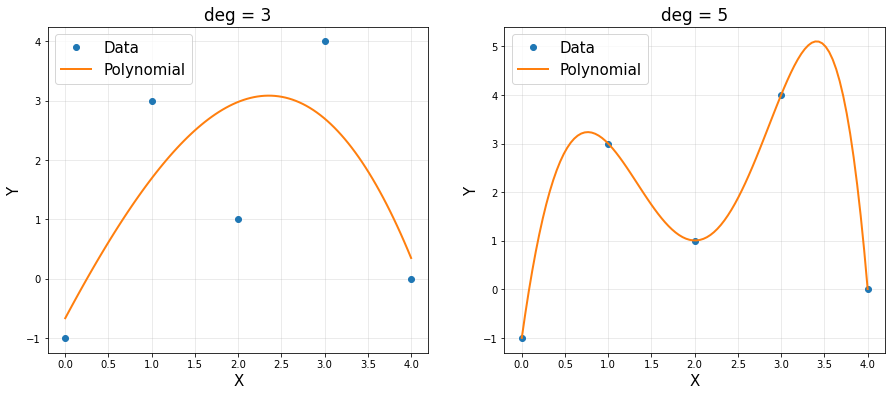

In [9]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(train_x, train_y, 'o', label='Data')
plt.plot(xp, y_poly(3, 20000), linewidth=2, label='Polynomial')
plt.title('deg = 3', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
poly_5 = np.polyfit(x, y, deg=5)
plt.plot(train_x, train_y, 'o', label='Data')
plt.title('deg = 5', fontsize=17)
plt.plot(xp, y_poly(5, 20000), linewidth=2, label='Polynomial')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

(3) Avoid the overfitting by adjusting number of iteration

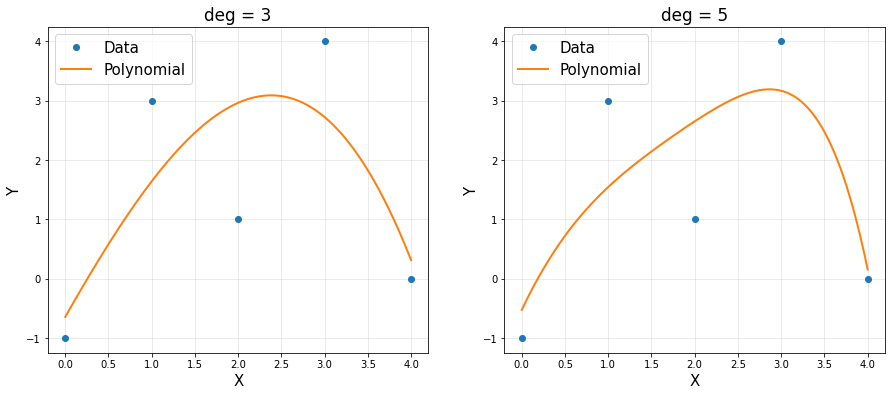

In [10]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(train_x, train_y, 'o', label='Data')
plt.plot(xp, y_poly(3, 1000), linewidth=2, label='Polynomial')
plt.title('deg = 3', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
poly_5 = np.polyfit(x, y, deg=5)
plt.plot(train_x, train_y, 'o', label='Data')
plt.title('deg = 5', fontsize=17)
plt.plot(xp, y_poly(5, 1000), linewidth=2, label='Polynomial')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

(4) Avoid the overfitting by using L1 or L2 regularization

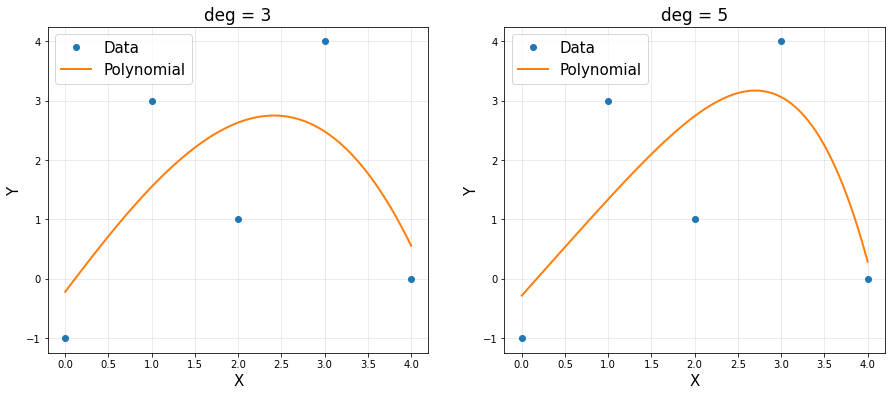

In [11]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.plot(train_x, train_y, 'o', label='Data')
plt.plot(xp, y_poly(3, 20000, 0.01), linewidth=2, label='Polynomial')
plt.title('deg = 3', fontsize=17)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
poly_5 = np.polyfit(x, y, deg=5)
plt.plot(train_x, train_y, 'o', label='Data')
plt.title('deg = 5', fontsize=17)
plt.plot(xp, y_poly(5, 20000, 0.01), linewidth=2, label='Polynomial')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()